# Analise de dados - Study Case Petlove

## Importando os dados e fazendo configurações nos dados

In [1]:
#Import das bibliotecas necessarias

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import numpy as np

In [2]:
#lista da definicao das colunas do arquivo

explain = {
    "id" : "Identificação do cliente",
    "created_at" : "Data de criação da assinatura",
    "updated_at" : "Data da última modificação da assinatura",
    "deleted_at" : "Data de cancelamento da assinatura",
    "name_hash" : "Nome do usuário (criptografado)",
    "email_hash" : "Email (criptografado)",
    "address_hash" : "Endereço (criptografado)",
    "birth_date" : "Data de aniversário do cliente",
    "status" : "Status da assinatura",
    "version" : "Versão da assinatura",
    "city" : "Cidade do cliente",
    "state" : "Estado do cliente",
    "neighborhood" : "Bairro do cliente",
    "last_date_purchase" : "Data do último pedido que ocorreu pela assinatura",
    "average_ticket" : "Média de gasto por pedido",
    "items_quantity" : "Média de itens na assinatura",
    "all_revenue" : "Total de receita realizado pelo cliente",
    "all_orders" : "Total de pedidos realizado pelo cliente",
    "recency" : "Tempo desde a última compra do cliente",
    "marketing_source" : "Canal de marketing que converteu a assinatura"    
}

In [3]:
#Realizando a importacao dos dados
df = pd.read_csv('data-test-analytics.csv')

In [4]:
#observando a estrutura dos dados
df.head(2)

,id,created_at,updated_at,deleted_at,name_hash,email_hash,address_hash,birth_date,status,version,city,state,neighborhood,last_date_purchase,average_ticket,items_quantity,all_revenue,all_orders,recency,marketing_source
0,8bf7960e-3b93-468b-856e-6c6c5b56f52b,08/15/17 07:05 AM,01/14/21 11:23 AM,NaN,312d206168a318614897e8ccac43bff9,83eb3aed9a44377df80ce876dce92c9a,8b4bfaa0cbc41a16f46da15ddcd6a907,07/10/74 12:00 AM,active,2.31.7,Peixoto da Praia,AM,Aparecida 7ª Seção,01/14/21 11:23 AM,151.142942,10,906.857651,6,35,crm
1,a39535b5-4647-4680-b4f6-3aed57c1f1ff,12/31/19 09:53 PM,01/08/21 11:23 AM,NaN,de448fcb47d0d6a873b2eef52b5ee595,72678bb35e2ac84ed373e81dd9dca28c,22f1cfa1847f38da3f3cb114dd2b9247,07/06/40 12:00 AM,paused,3.30.12,Fernandes,RR,Santa Isabel,01/08/21 11:23 AM,236.991790,4,236.991790,1,41,organic_search


In [5]:
#alterando as colunas de criação da assinatura e dele
df['created_at'] = pd.to_datetime(df['created_at'])
df['updated_at'] = pd.to_datetime(df['updated_at'])
df['deleted_at'] = pd.to_datetime(df['deleted_at'])
df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'])

In [6]:
#Mostra numero de colunas e linhas

df.shape

(10000, 20)

In [7]:
#Mostra os nomes das colunas 

df.columns.values

array(['id', 'created_at', 'updated_at', 'deleted_at', 'name_hash',
       'email_hash', 'address_hash', 'birth_date', 'status', 'version',
       'city', 'state', 'neighborhood', 'last_date_purchase',
       'average_ticket', 'items_quantity', 'all_revenue', 'all_orders',
       'recency', 'marketing_source'], dtype=object)

In [8]:
#Chegando por dados nulos

df.isna().sum()

id                       0
created_at               0
updated_at               0
deleted_at            9495
name_hash                0
email_hash               0
address_hash             0
birth_date               0
status                   0
version                  0
city                     0
state                    0
neighborhood             0
last_date_purchase       0
average_ticket           0
items_quantity           0
all_revenue              0
all_orders               0
recency                  0
marketing_source         0
dtype: int64

## Analisando informações gerais

In [9]:
#algumas estatisticas dos dados
df.describe()

,average_ticket,items_quantity,all_revenue,all_orders,recency
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,216.894709,8.49980,1174.888603,5.415400,67.192900
std,22.757213,3.02604,763.141973,3.457577,175.723276
min,131.378672,1.00000,0.000000,0.000000,1.000000
25%,201.398851,6.00000,494.873564,2.000000,31.000000
50%,217.019478,8.00000,1172.751918,5.000000,35.000000
75%,232.455042,11.00000,1798.475045,8.000000,39.000000
max,303.386848,19.00000,3225.654163,11.000000,1820.000000


In [10]:
#numero de assinaturas canceladas
df['status'].value_counts()

active      8524
paused       971
canceled     505
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

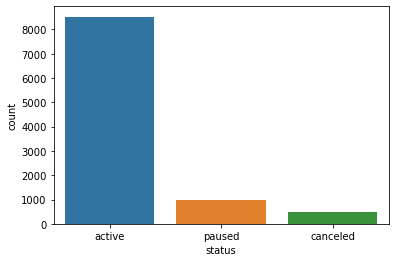

In [11]:
#visualizando a contagem dos assinantes, não assinantes e assinaturas pausadas
sns.countplot(x=df['status'])

In [12]:
#qual a porcentagem dos status dos clientes?
num_assinantes = df[df.status == 'active'].shape[0]
num_pausados = df[df.status == 'paused'].shape[0]
num_churn = df[df.status == 'canceled'].shape[0]

print('{:10.2f}% de clientes que manteram sua assinatura'.format(num_assinantes / (num_churn + num_assinantes + num_pausados) * 100))

print('{:10.2f}% de clientes que pausaram sua assinatura'.format(num_pausados / (num_churn + num_assinantes + num_pausados) * 100))

print('{:10.2f}% de clientes cancelaram sua assinatura'.format(num_churn / (num_churn + num_assinantes + num_pausados) * 100))

print('Dados até a data de {}'.format(df['created_at'].max().year))

     85.24% de clientes que manteram sua assinatura
      9.71% de clientes que pausaram sua assinatura
      5.05% de clientes cancelaram sua assinatura
Dados até a data de 2021


As colunas que entregam informações de data encontram-se no formato String. Assim para podermos trabalhar com o tipo data, geramos um novo data frame para nossa análise. 

## Comparação entre os 3 status

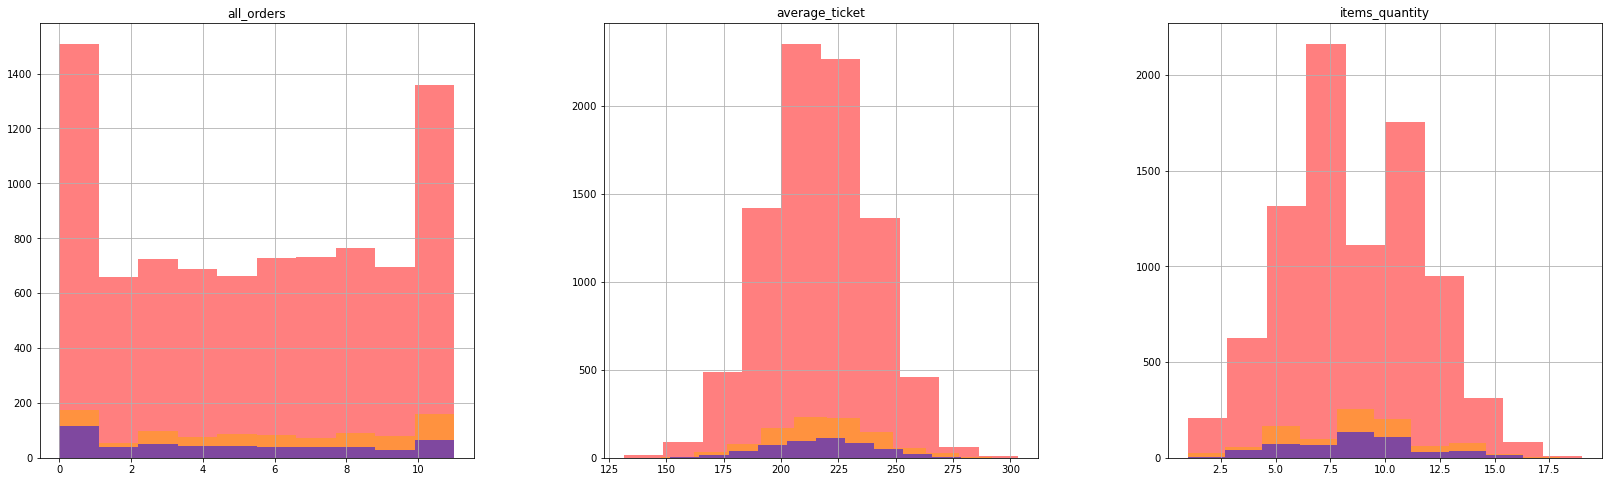

<Figure size 2016x576 with 0 Axes>

In [75]:
#distribuição dos contas canceladas em total de pedidos, média de gasto por pedido, quantidade de itens pedidos

categorias_numericas = ['all_orders', 'average_ticket','items_quantity']

fig, ax = plt.subplots(1, 3, figsize = (28,8))
plt.figure(figsize=(28,8))
df[df.status == 'active'][categorias_numericas].hist(bins = 10, color ='red',  alpha =0.5, ax=ax)
df[df.status == 'paused'][categorias_numericas].hist(bins = 10,  color = 'orange',  alpha =0.5, ax=ax)
df[df.status == 'canceled'][categorias_numericas].hist(bins = 10, color = 'blue', alpha =0.5, ax=ax)
plt.show()

In [80]:
df[df.status == 'active'][categorias_numericas].mean()

all_orders          5.444510
average_ticket    216.732335
items_quantity      8.477710
dtype: float64

In [81]:
df[df.status == 'paused'][categorias_numericas].mean()

all_orders          5.450051
average_ticket    218.037307
items_quantity      8.616890
dtype: float64

In [82]:
df[df.status == 'canceled'][categorias_numericas].mean()

all_orders          4.857426
average_ticket    217.438501
items_quantity      8.647525
dtype: float64

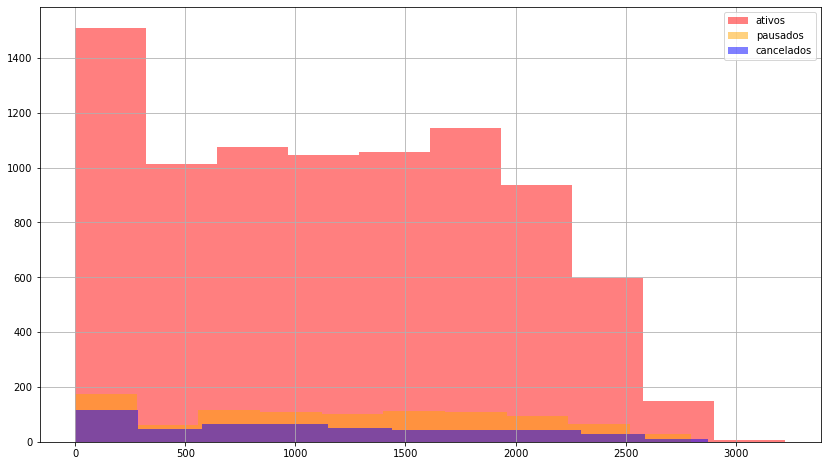

In [83]:
#distribuicao da receita gerada dos três status

plt.figure(figsize=(14,8))
df[df.status == 'active']['all_revenue'].hist(bins = 10, color ='red',  alpha =0.5, label = 'ativos')
df[df.status == 'paused']['all_revenue'].hist(bins = 10,  color = 'orange',  alpha =0.5, label = 'pausados')
df[df.status == 'canceled']['all_revenue'].hist(bins = 10, color = 'blue', alpha =0.5,label = 'cancelados')
plt.legend()
plt.show()

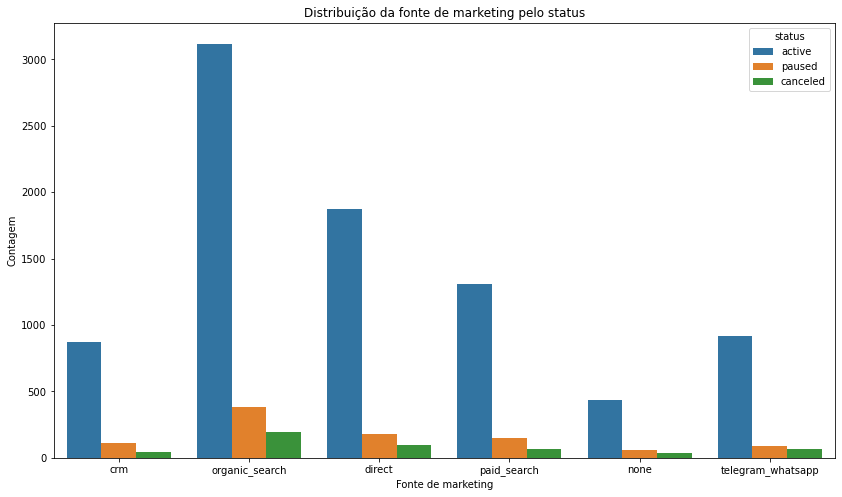

In [42]:
#distribuição dos status da assinatura pela fonte de marketing
plt.figure(figsize=(14,8))
sns.countplot( x = 'marketing_source', hue = 'status' , data = df)
plt.title('Distribuição da fonte de marketing pelo status')
plt.xlabel('Fonte de marketing')
plt.ylabel('Contagem')
plt.show()

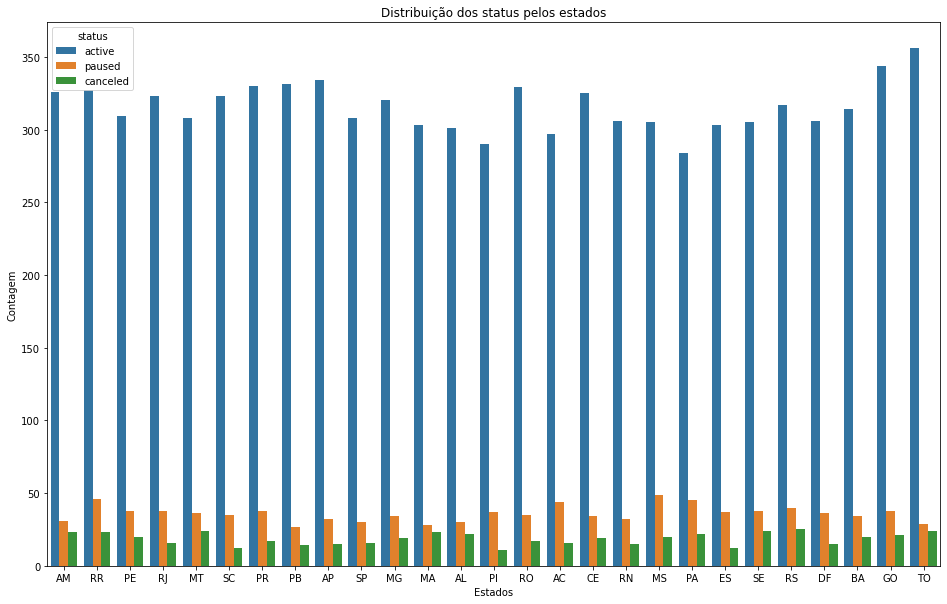

In [36]:
#distribuição dos status pelos estados
plt.figure(figsize=(16,10))
sns.countplot( x = 'state', hue = 'status' , data = df)
plt.title('Distribuição dos status pelos estados')
plt.xlabel('Estados')
plt.ylabel('Contagem')
plt.show()

In [38]:
df['version'].value_counts() #dados muito dispersos

4.26.7     24
3.25.9     22
4.27.7     22
4.23.8     20
3.28.7     20
           ..
2.48.12     1
6.22.12     1
4.46.7      1
6.9.6       1
5.51.6      1
Name: version, Length: 2905, dtype: int64

## Estudo do perfil dos clientes com status cancelados(Churn)

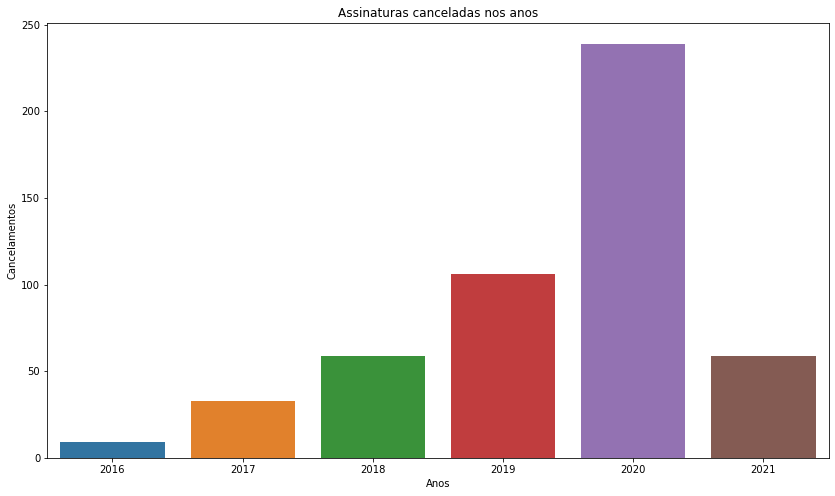

In [31]:
# distribuição dos cancelamentos de assinatura pelos anos
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"')['deleted_at']).year)
plt.title('Assinaturas canceladas nos anos')
plt.xlabel('Anos')
plt.ylabel('Cancelamentos')
plt.show()

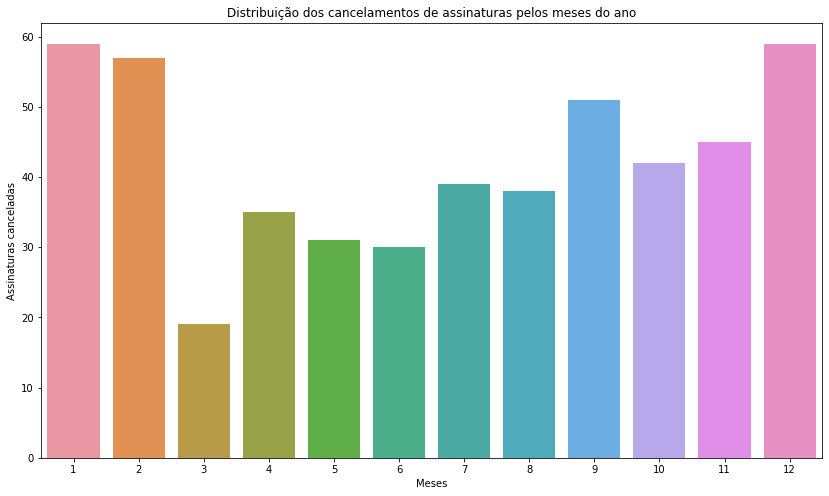

In [30]:
#distribuição do cancelamento de assinaturas pelos meses
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"')['deleted_at']).month)
plt.title('Distribuição dos cancelamentos de assinaturas pelos meses do ano')
plt.xlabel('Meses')
plt.ylabel('Assinaturas canceladas')
plt.show()

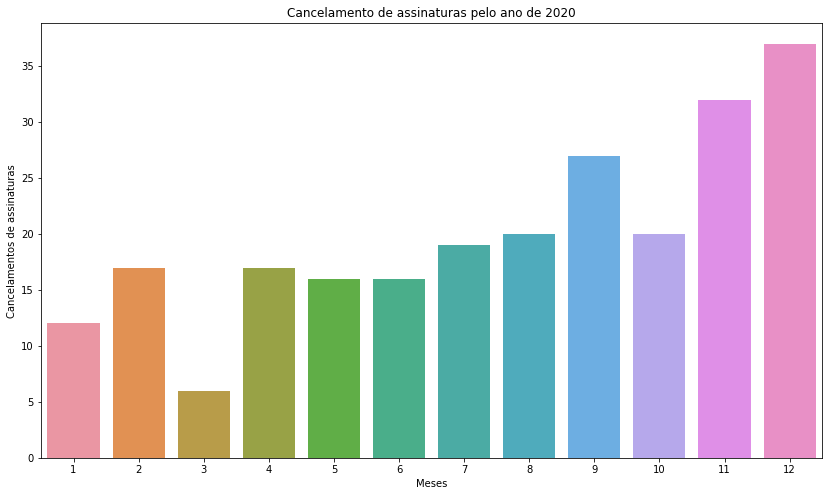

In [32]:
#cancelamento de assinaturas em 2020
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"').loc[(df['deleted_at'] >= '2020') & (df['deleted_at'] < '2021')]['deleted_at']).month)
plt.title('Cancelamento de assinaturas pelo ano de 2020')
plt.xlabel('Meses')
plt.ylabel('Cancelamentos de assinaturas')
plt.show()

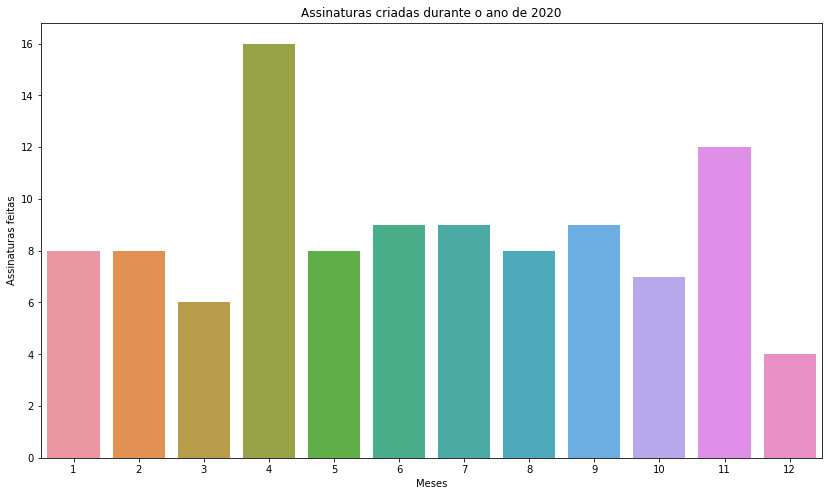

In [34]:
#criação de assinaturas em 2020
plt.figure(figsize = (14,8))
sns.countplot(x = pd.DatetimeIndex(df.query('status == "canceled"').loc[(df['created_at'] >= '2020') & (df['created_at'] <'2021')]['created_at']).month)
plt.title('Assinaturas criadas durante o ano de 2020')
plt.xlabel('Meses')
plt.ylabel('Assinaturas feitas')
plt.show()

Podemos observar que o período de maior evasão do ano de 2020 foi em Dezembro, aliado ao menor período de aberturas de assinaturas.

In [88]:
explain['average_ticket']

'Média de gasto por pedido'

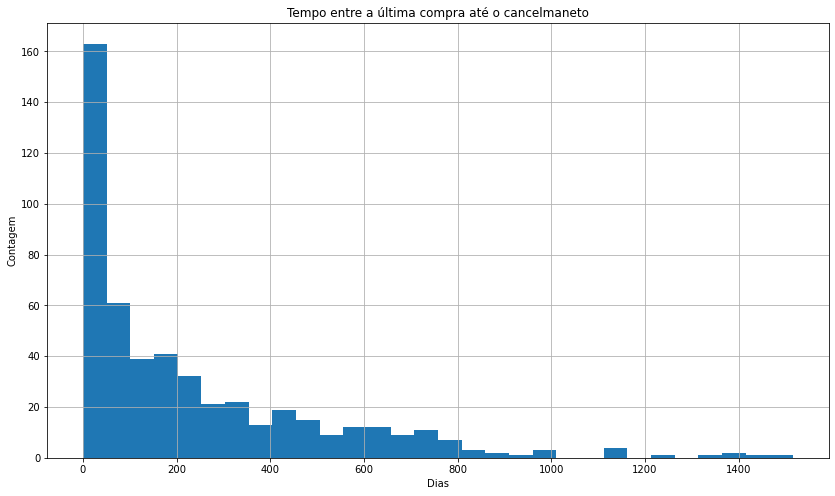

In [37]:
#tempo do inicio da assinatura até o cancelamento
plt.figure(figsize=(14,8))
(df.query('status == "canceled"')['deleted_at'] - df.query('status == "canceled"')['last_date_purchase']).dt.days.hist(bins=30)
plt.title('Tempo entre a última compra até o cancelmaneto')
plt.xlabel('Dias')
plt.ylabel('Contagem')
plt.show()

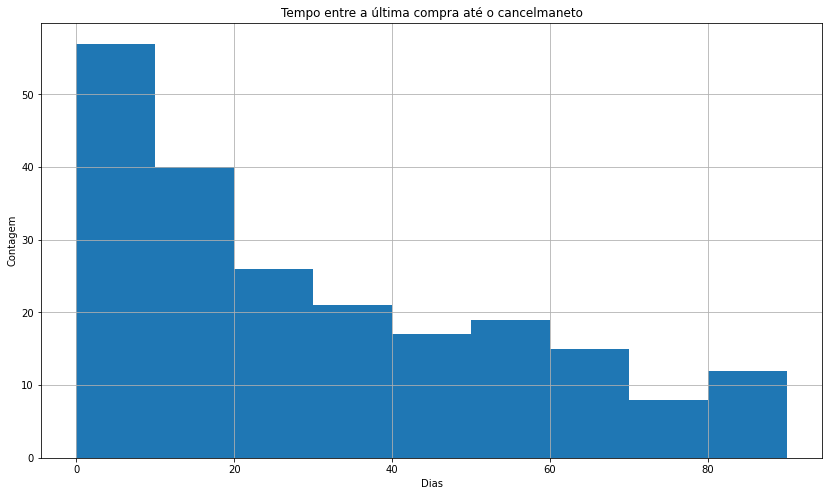

In [38]:
plt.figure(figsize=(14,8))
(df.query('status == "canceled"')['deleted_at'] - df.query('status == "canceled"')['last_date_purchase']).dt.days.hist(bins=range(0,100,10))
plt.title('Tempo entre a última compra até o cancelmaneto')
plt.xlabel('Dias')
plt.ylabel('Contagem')
plt.show()

Observa-se que a maior chance da pessoa cancelar sua assinatura quando não compra pro 1 mês.

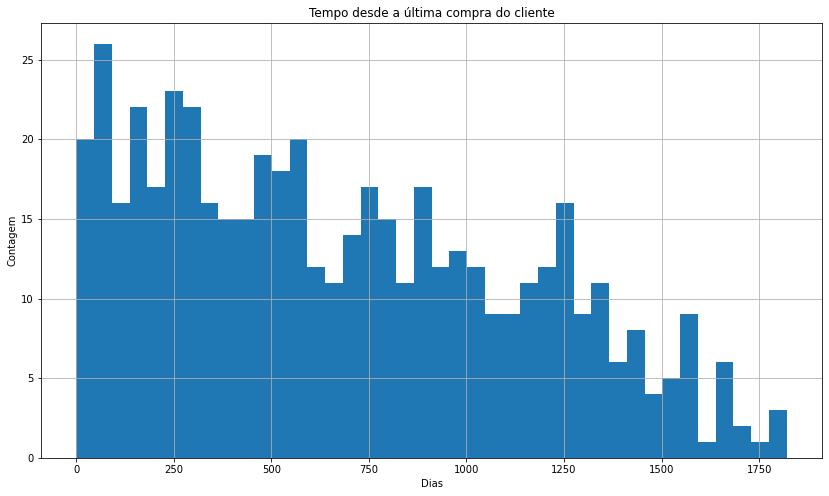

In [41]:
plt.figure(figsize=(14,8))
df.query('status == "canceled"')['recency'].hist(bins=40)
plt.title('Tempo desde a última compra do cliente')
plt.xlabel('Dias')
plt.ylabel('Contagem')
plt.show()

## Estudo do perfil do clientes no ano de 2020

In [110]:
explain

{'id': 'Identificação do cliente',
 'created_at': 'Data de criação da assinatura',
 'updated_at': 'Data da última modificação da assinatura',
 'deleted_at': 'Data de cancelamento da assinatura',
 'name_hash': 'Nome do usuário (criptografado)',
 'email_hash': 'Email (criptografado)',
 'address_hash': 'Endereço (criptografado)',
 'birth_date': 'Data de aniversário do cliente',
 'status': 'Status da assinatura',
 'version': 'Versão da assinatura',
 'city': 'Cidade do cliente',
 'state': 'Estado do cliente',
 'neighborhood': 'Bairro do cliente',
 'last_date_purchase': 'Data do último pedido que ocorreu pela assinatura',
 'average_ticket': 'Média de gasto por pedido',
 'items_quantity': 'Média de itens na assinatura',
 'all_revenue': 'Total de receita realizado pelo cliente',
 'all_orders': 'Total de pedidos realizado pelo cliente',
 'recency': 'Tempo desde a última compra do cliente',
 'marketing_source': 'Canal de marketing que converteu a assinatura'}

<AxesSubplot:>

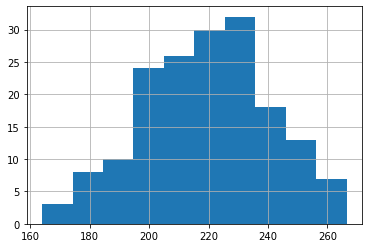

In [111]:
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)]['average_ticket'].hist()

<AxesSubplot:xlabel='marketing_source', ylabel='count'>

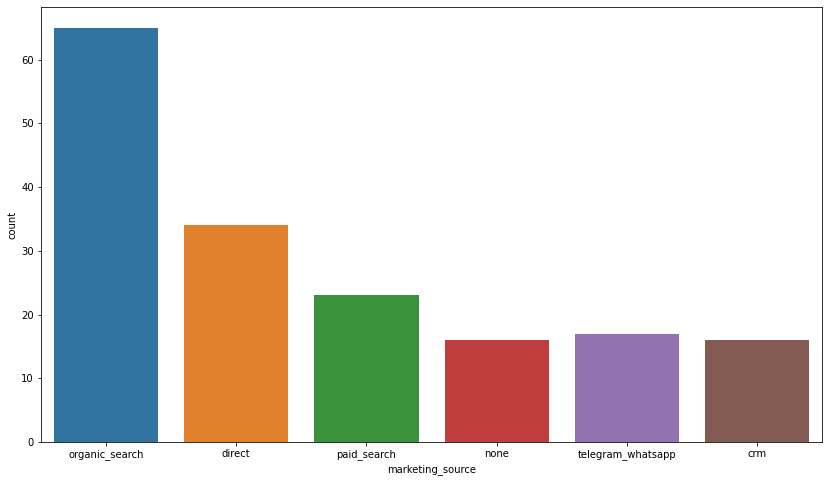

In [115]:
plt.figure(figsize = (14,8))
sns.countplot(x = df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)]['marketing_source'])

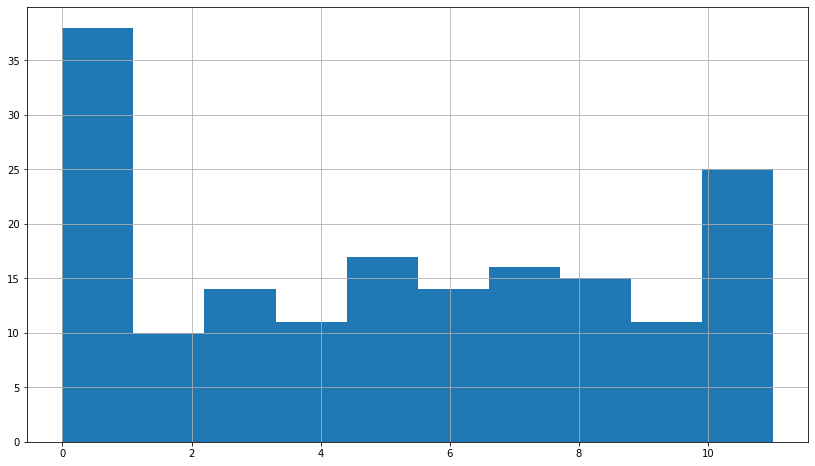

In [132]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)]['all_orders'].hist(bins=10)
plt.show()

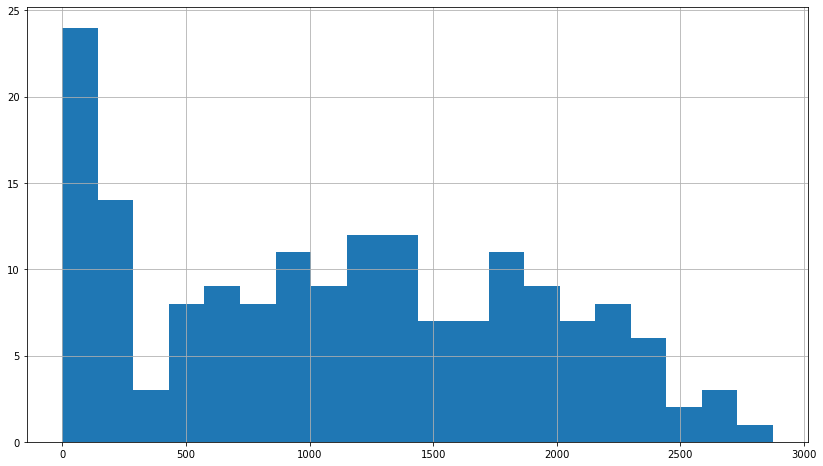

In [138]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020)]['all_revenue'].hist(bins=20)
plt.show()

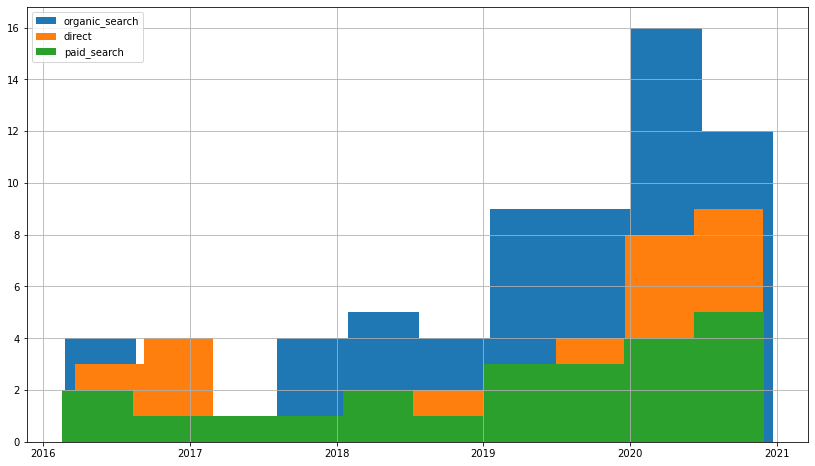

In [163]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'organic_search')]['created_at'].hist(bins=10, label = 'organic_search')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'direct')]['created_at'].hist(bins=10, label = 'direct')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'paid_search')]['created_at'].hist(bins=10, label = 'paid_search')
plt.legend()
plt.show()

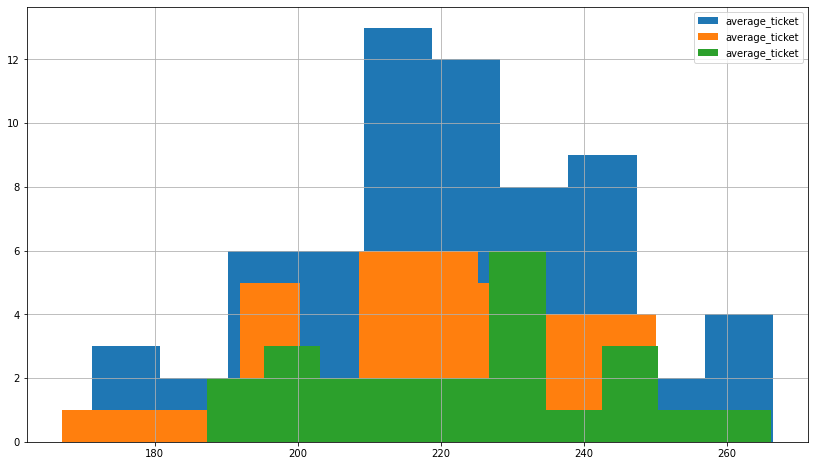

In [162]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'organic_search')]['average_ticket'].hist(bins=10, legend = 'organic_search')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'direct')]['average_ticket'].hist(bins=10, legend = 'direct')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'paid_search')]['average_ticket'].hist(bins=10, legend = 'paid_search')
plt.show()

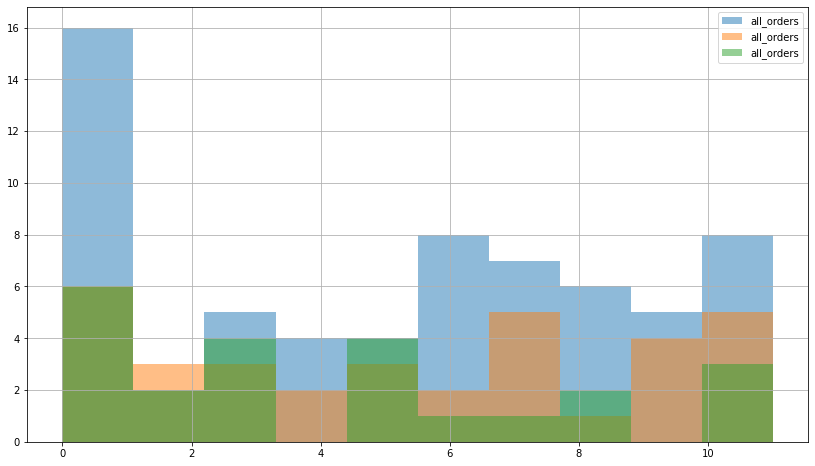

In [165]:
plt.figure(figsize = (14,8))
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'organic_search')]['all_orders'].hist(bins=10,alpha = 0.5, legend = 'organic_search')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'direct')]['all_orders'].hist(bins=10, alpha = 0.5,legend = 'direct')
df.loc[(pd.DatetimeIndex(df['deleted_at']).month >= 6) & (pd.DatetimeIndex(df['deleted_at']).year == 2020) & (df['marketing_source'] == 'paid_search')]['all_orders'].hist(bins=10, alpha = 0.5,legend = 'paid_search')
plt.show()